E7.project_Find_Similar_Celebrities
===
---

얼굴 임베딩간의 거리를 근거하여 자신의 얼굴과 가장 닮은 샐럽을 찾아 1순위부터 5순위까지 나타내주는 기능을 만들어보자.

![닮은꼴](https://user-images.githubusercontent.com/70703320/106718599-9a737800-6644-11eb-8284-8e8e7e0b7321.jpg)

## 얼굴 영역을 구하는 함수

In [1]:
import face_recognition
import os
import matplotlib.pyplot as plt

def get_gropped_face(image_file):

    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)

    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face
    

## 디렉토리에 어떤 이미지 파일들이 포함되어 있는지 리스트 확인

In [2]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['카이.jpg', '슬기.jpg', '배성우.png', '이민호.jpeg', '차승원.jpg', '나나.jpg', '서현진.jpg', '성룡.jpg', '이성민.jpg', '박보검.jpg', '나.jpg', '박정민.jpg', '딕헌터.jpeg', '줄리엔강.png', '류준열.jpg', 'obama.jpg', '여자아이들수진.jpeg', '강민경.jpg', '하승진.jpg', '박보영.jpg', '도지한.jpg', '권현빈.jpg', '시우민.jpg', '박완규.png', '최양락.jpg', '옥냥이.jpeg', '정형돈.jpg', '로저 무어.jpeg', '수호.jpg', '이대형.jpg', '차명석.jpg', '박용택.jpg', '김고은.jpeg', '조승우.jpeg', '김상호.png', '제이크 질렌할.jpeg', '레오나르도 디카프리오.jpeg', '김남주.jpeg', '이광수.jpg', '장원영.jpeg', '하정우.jpg', '아린.jpg', '잭 스페이더.jpeg', '리아.jpg', '조인성.jpg', '이용진.jpg', '로다주.jpeg', '박신양.png', '손예진.jpeg', '김현수.jpeg', '박희순.jpg', '조달환.png', '마동석.jpeg', '무라니시.png', '공효진.jpg', '박진영.jpeg', '앤드류 응.png', '첸.jpg', '김경진.png', '오재원.jpg', '이희준.jpg', '서강준.jpg', '정수빈.jpg', '조정석.jpg', '태연.jpg', '트와이스나연.jpg', '크리스 햄스워스.jpg', '승희.jpeg', '유지태.jpg', '김광현.jpg', '정준하.jpg', '크리스 에반스.jpg', '티모시 달튼.jpeg', '레인보우재경.jpg', '장도연.jpg', '방시혁.jpeg', '로제.jpg', '온앤오프라운.jpg', '기성용.jpg', '안재홍.jpg', '사쿠라.jpg', '손호준.jpeg', '최현석.jpg', '정우성.jpeg', '권태원.jpe

## 얼굴 영역을 구하는 함수

In [3]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)


## 이미지 디렉토리 안에 있는 모든 이미지 파일의 임베딩을 구해서 dictionary만드는 함수

In [4]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[file] = embedding[0]

    return embedding_dict

### 이미지 임베딩 리스트 만들기

In [5]:
image_list = []
for file in file_list:
    img_path = os.path.join(dir_path, file)
    face = get_gropped_face(img_path)
    embedding = get_face_embedding(face)
    if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
        image_list.append(embedding[0])

### 나의 얼굴 임베딩 값 출력해보기

In [6]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['나.jpg']

array([-0.09317791,  0.12774155,  0.01227186, -0.0706576 , -0.06898257,
       -0.05622173, -0.07642247, -0.12616113,  0.1594968 , -0.15321405,
        0.21782754, -0.03158019, -0.24658638, -0.14110656, -0.00246603,
        0.19334383, -0.23079452, -0.13288848,  0.0199502 , -0.00482544,
        0.08386774, -0.05345199,  0.03911264,  0.04133918, -0.09149364,
       -0.31881928, -0.1100973 , -0.09747444,  0.00863652, -0.04083987,
       -0.02481955, -0.06011121, -0.15924403, -0.03460151, -0.00112526,
        0.07351268, -0.06570099, -0.07583643,  0.20256414, -0.01419396,
       -0.2169673 , -0.00527937,  0.01754892,  0.20648351,  0.12774968,
        0.04991414,  0.0500507 , -0.15328763,  0.12320832, -0.14543049,
        0.03860478,  0.16839987,  0.07681568,  0.05112695,  0.01583003,
       -0.15488024,  0.03941821,  0.11885399, -0.16534929,  0.00223951,
        0.10816534, -0.00206228, -0.0472151 , -0.09251864,  0.27663422,
        0.09372947, -0.18519162, -0.19489837,  0.10861532, -0.14

## 두 사람의 얼굴 임베딩 값 차이 거리 구하는 함수

In [7]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

## 나의 두 사진 거리 구해보기

0.3566789739694348

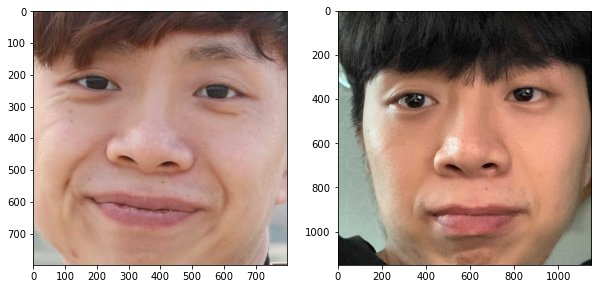

In [8]:
image_path1 = os.getenv('HOME')+'/aiffel/face_embedding/images/나.jpg'
image_path2 = os.getenv('HOME')+'/aiffel/face_embedding/images/나나.jpg'
cropped_face1 = get_gropped_face(image_path1)
cropped_face2 = get_gropped_face(image_path2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cropped_face1)
plt.subplot(1, 2, 2)
plt.imshow(cropped_face2)
get_distance('나.jpg', '나나.jpg')

## 임베딩 거리를 비교하는 함수 만들기

In [9]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('나.jpg')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

## 나와 얼굴 임베딩 거리가 가까운 샐럽들을 1~5위 뽑아주는 함수 정의하기 (최종)

In [10]:
import matplotlib.pyplot as plt



def get_nearest_face(name, top=5):
    plt.figure(figsize=(10, 15))
    plt.subplot(3, 2, 1)
    plt.title('Me')
    image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/'
    cropped_face = get_gropped_face(image_path + '%s' %(name))
    plt.imshow(cropped_face)
    
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+2):
        if i < 2 :   # 첫번째와 두번째는 둘 다 본인 사진일 것이므로 삭제
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i-1, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

            image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/'
            cropped_face = get_gropped_face(image_path + '%s' %(sorted_faces[i][0]))
            plt.subplot(3, 2, i)
            plt.title('%d' %(i-1) )
            plt.imshow(cropped_face)

            


### 나와 가장 닮은 샐럽은?

순위 1 : 이름(박건우.png), 거리(0.4200338403185902)
순위 2 : 이름(영알남.png), 거리(0.43555606451700657)
순위 3 : 이름(진.jpg), 거리(0.43843291052183897)
순위 4 : 이름(윤도현.png), 거리(0.4588863816995528)
순위 5 : 이름(권현빈.jpg), 거리(0.4609392707355676)


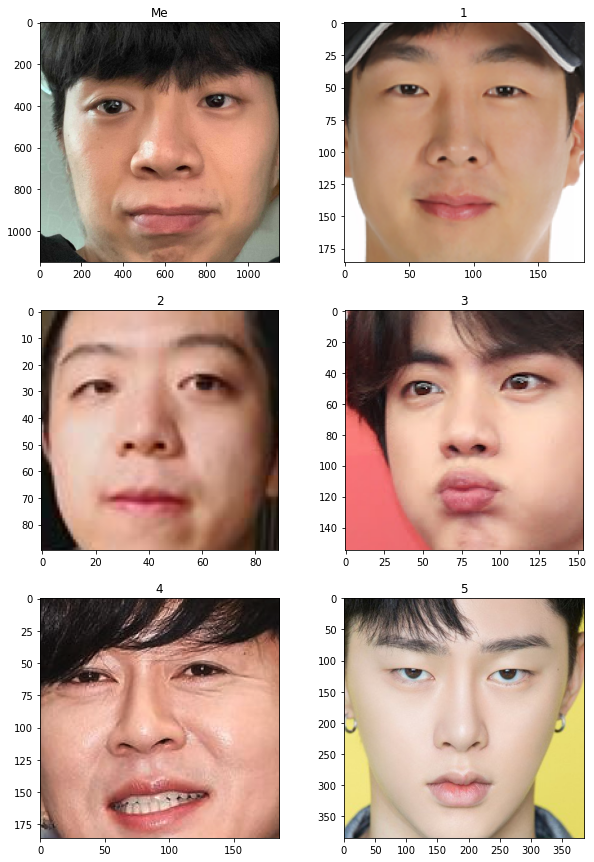

In [11]:
get_nearest_face('나나.jpg')

## T-SNE로 시각화 해보기

나의 2장의 사진과 나와 닮은 샐럽 5명의 임베딩 값과 나머지 샐럽들의 색을 달리하여 시각화!

### 리스트를 데이터프레임으로 바꿔주기

In [12]:
import numpy as np

image_matrix = np.array(image_list)

### T-SNE로 차원축소 해주기

In [13]:
from sklearn.manifold import TSNE

print("image_matrix의 shape: {}".format(image_matrix.shape))

data_subset = image_matrix
n_dimension = 2
tsne = TSNE(n_components=n_dimension)
tsne_results = tsne.fit_transform(data_subset)

print("tsne_results의 shape: {}".format(tsne_results.shape))

image_matrix의 shape: (275, 128)
tsne_results의 shape: (275, 2)


### img_mrx 데이터 프레임 만들어주기

In [14]:
import pandas as pd

img_mrx = []
img_mrx = pd.DataFrame(img_mrx)

### 시각화 해주기

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

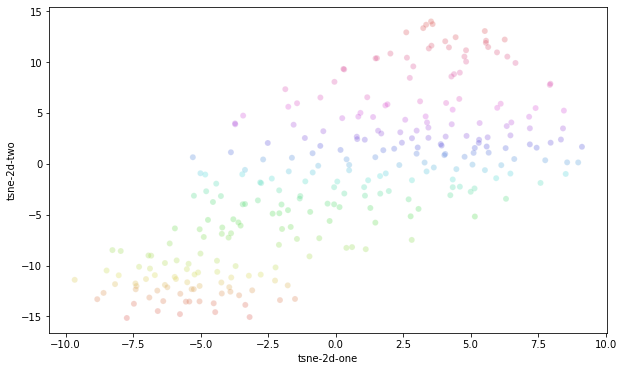

In [15]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# tsne 결과를 차원별로 추가합니다.
img_mrx['tsne-2d-one'] = tsne_results[:,0]
img_mrx['tsne-2d-two'] = tsne_results[:,1]

# 시각화해 봅니다.
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="tsne-2d-two",
    palette=sns.color_palette("hls", 275),
    data=img_mrx,
    legend=False,
    alpha=0.3
)

### 회고

- 1순위부터 5순위까지 얼굴사진 추출하여 보여주는 것을 함수안에 넣어주었는데 이 과정에서 이름과 확장자명이 같이 출력되었다. 그래도 한 번에 나와 얼굴 임베딩 거리가 가까운 샐럽들의 목록과 사진을 같이 출력해준다는 것에 의미를 두려고 한다.

- T-SNE를 통한 시각화하였다. 각 얼굴별로 다른 색을 지정하였기에 큰 의미를 지니지는 못한다. 원래는 나와 얼굴 거리가 가까운 샐럽들의 색을 다르게 해주려고 하였었다. 하지만 이 목록들을 데이터 프레임에서 컬럼하나를 만들어 구분자로 넣어주려고 했는데 이들을 찾는 방법을 생각해내지 못하였다. 

- 사진 데이터베이스에 얼굴인식이 되지 않는 사진들이 존재하였다. try와 except 문을 사용하여 목록들을 뽑아내고 싶었지만 코딩으로 구현하기가 어려웠다. 목록들은 알기에 지워주고 실행하였기에 얼굴인식이 안되는 사진들에 대해서는 적용이 어려울 듯하다.


### 루브릭

- 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.
    - 나와 가장 닮은 샐럽은 ? 부분을 참조
    
- 다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.
    - 5명 모두 0.5 이내이다.
    
- matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.
    - T-SNE를 128차원을 2차원으로 축소하여 시각화 하였다.